In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import special
from scipy.stats import expon

import matplotlib.pylab as plt

from IPython.display import Markdown

In [3]:
tau  = 1.
x = np.linspace(0, 10, 1000)

In [4]:
nevents = 50
data = np.random.exponential(tau, nevents)

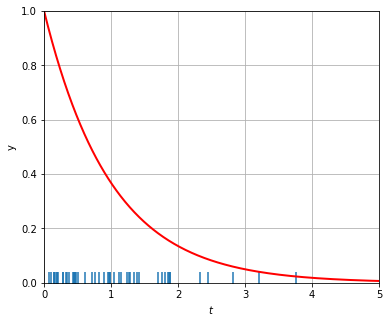

In [5]:
fig, ax = plt.subplots(figsize=(6,5)) 

ax.scatter(data, np.zeros(nevents), s = 500, marker = '|') 
ax.plot(x, expon(0,tau).pdf(x), lw=2, color="red")
ax.set_xlim(0,5)
ax.set_ylim(0,1)
ax.set_xlabel("$t$")
ax.set_ylabel("y")
ax.grid()
fig.savefig("./figs/tau_distribution.png")

In [6]:
tau_estimate =  1./nevents * np.sum(data)
print (f"Best estimate is {tau_estimate:.2f}")

Best estimate is 1.05


In [7]:
sigma = np.sqrt(tau_estimate**2/nevents)
print (sigma)

0.14799631822070852


In [8]:
def llh(tau):
    likelihood = np.sum(np.log(expon(0, tau).pdf(data)))
    return likelihood

In [9]:
l = []
taus = np.arange(0.5, 1.6, 0.01)
for t in taus:
    l.append(llh(t))

In [31]:
print (sigma)

0.14799631822070852


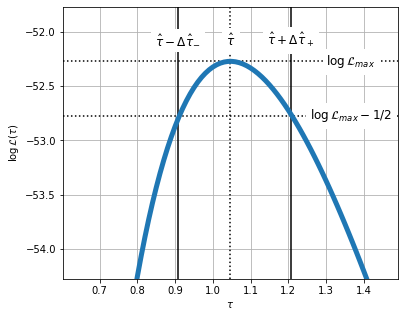

In [58]:
fig, ax3 = plt.subplots(figsize=(6,5)) 

ax3.grid()
ax3.set_xlim(0, 2)
ax3.set_xlabel(r"$\tau$")
ax3.set_ylabel(r"$\log \mathcal{L}(\tau)$")
ax3.axhline(y=np.max(l)-0.5, linestyle=":", color="black")
ax3.axhline(y=np.max(l), linestyle=":", color="black")
ax3.set_ylim(np.max(l)-2, np.max(l)+0.5)
ax3.axvline(x=tau_estimate, linestyle=":", color="black")
ax3.axvline(x=tau_estimate + 0.16, linestyle="-", color="black")
ax3.axvline(x=tau_estimate - 0.14, linestyle="-", color="black")
ax3.set_xlim(tau_estimate - 3 * sigma, tau_estimate + 3 * sigma)
ax3.plot(taus, l, lw=5)
ax3.text(tau_estimate + 2* 0.16, np.max(l) - 0.5, '$\log \mathcal{L}_{max} - 1/2$', fontsize=12, va='center', ha='center', backgroundcolor='w')
ax3.text(tau_estimate + 2* 0.16, np.max(l), '$\log \mathcal{L}_{max}$', fontsize=12, va='center', ha='center', backgroundcolor='w')
ax3.text(tau_estimate + 0.16, np.max(l)+0.2, r'$\hat{\tau} + \Delta \hat{\tau}_+$', fontsize=12, va='center', ha='center', backgroundcolor='w')
ax3.text(tau_estimate - 0.14, np.max(l)+0.2, r'$\hat{\tau} - \Delta \hat{\tau}_{-}$', fontsize=12, va='center', ha='center', backgroundcolor='w')
ax3.text(tau_estimate, np.max(l)+0.2, r'$\hat{\tau}$', fontsize=12, va='center', ha='center', backgroundcolor='w')
fig.savefig("./figs/tau_variance_graph.png")
plt.show()

In [8]:
nexperiments = 100
tau_estimates = []
for i in range(0, nexperiments):
   data = np.random.exponential(tau_estimate, nevents)
   tau_estimates.append(1./nevents * np.sum(data))

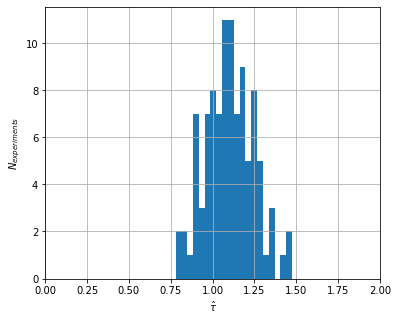

In [9]:
fig, ax2 = plt.subplots(figsize=(6,5)) 
ax2.hist(tau_estimates, bins = 20)
ax2.grid()
ax2.set_xlim(0, 2)
ax2.set_xlabel(r"$\hat{\tau}$")
ax2.set_ylabel("$N_{experiments}$")
fig.savefig("./figs/tau_estimate_distribution.png")
plt.show()

In [14]:
np.sqrt(np.var(tau_estimates))

0.14334467560880082